# Practical 7 - Part 2A
This second half of the lab explores the geometry of a single camera. In 2B the goal is to use a set of correspondance points to estimate a transformation matrix from a plane's 3D space to camera space and use that matrix to project some other points into camera space.

In this section, we'll work on building two components that we need for 2B, a method to estimate that transformation and a method that can project points into camera image space.

First we'll tackle the projection method, `projectiveCamera`. We want to find the image space coordinates, `XImCart`, of a set of 3D world coordinates, `XCart`, given a camera intrinsics matrix `K` and an extrinsics matrix `T`.

The second component is a method to estimate a Eucledian transformation, `TEst`, that takes us from a plane's 3D coordinate space to 3D camera space by utilizing a given set of points in camera image space, `XImCart`, and a set of corresponding points in world space, `XCart`. Essentially we want to compute the extrinsics matrix we can use in `projectiveCamera`.

Estimating the camera pose will involve calculating a homography, so you'll need to copy over your functions from part 1A/1B in the space provided.

## Import libraries 

importing Jupyter notebook from practical1A.ipynb


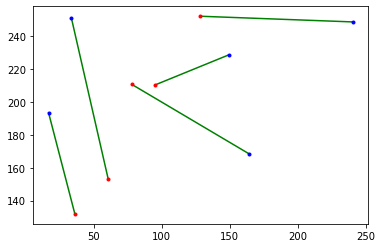

Sqaured difference between pts2Cart and pts2EstCart is: 7.97


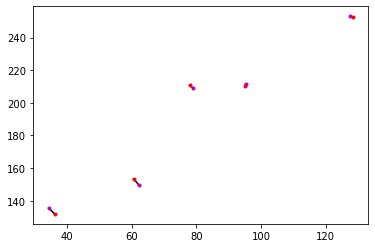

In [1]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

import import_ipynb
from practical1A import solveAXEqualsZero
from practical1A import calcBestHomography

In [2]:
def projectiveCamera(K,T,XCart):
    
    ##TODO
    # The goal of this function is to project points in XCart through projective camera
    # defined by intrinsic matrix K and extrinsic matrix T. In essence, this function takes a set of points 
    # in 3D world space, XCart, and projects them into camera image space by applying the extrinsic matrix T 
    # and then applying the intrinsic matrix K.
    # 
    # There are three steps.
    # 1) Move from world space to camera space. 
    #            camera space points = extrinsics T * world space points 
    #
    # 2) Applying the intrinsics matrix to the camera space points after normalizing
    #           homogeneous image space points = K * normalized camera space points
    # 
    # 3) Move to image space cartesian points from image space homogeneous points, involves a 
    # normalization using the third row.
    
    
    # TO DO: Replace this
    #XImCart = []
    
    # TO DO: Convert Cartesian 3d points XCart to homogeneous coordinates XHom
    XHom = np.vstack([XCart,np.ones(XCart.shape[1])])

    # TO DO: Apply extrinsic matrix to XHom, to move to frame of reference of camera
    mul= T@XHom
    
    # TO DO: Project points into normalized camera coordinates xCamHom (remove 4th row)
    xCamHom = mul[0:3,:]
    
    # TO DO: Move points to image coordinates xImHom by applying intrinsic matrix
    
    xImHom = K@xCamHom
    
    # TO DO: Convert points back to Cartesian coordinates xImCart
    
    XImCart = xImHom[0:2,:]/xImHom[2,:]
    

    
    return XImCart


## Camera Projection

First we'll write up the function that can take us from 3D world space, `XCart`, to camera image space, `XImCart`, using an extrinsics matrix `T` and an intrinsics matrix `K` that are provided. The previous block houses this function.

The result here is the cartesian image space point coordinates, `XImCart`, of the 3D points `XCart`. If `XCart` represents a box in the world then we now know where the box's vertices would land in image space.

To verify that your solution is correct please compare your image space points to those in the comment.

Once they match, move on to the next bit - estimating a transformation! 

In [3]:
# We assume that the camera intrinsics matrix K is known and has values:
K = np.array([[640, 0, 320],
             [0, 640, 240],
             [0, 0, 1]])

# We will assume an object co-ordinate system with the Z-axis pointing upwards and the origin
# in the centre of the plane. There are five known points on the plane with coordinates (mm):
XCart = np.array([[-100, -100,  100,  100, 0],
                  [-100,  100,  100, -100, 0],
                  [   0,    0,    0,    0, 0]])

# We assume the correct transformation from the plane co-ordinate system to the
# camera co-ordinate system (extrinsic matrix) is:
T = np.array([[0.9851,  -0.0492,  0.1619,  46.00],
             [-0.1623,  -0.5520,  0.8181,  70.00],
             [0.0490,  -0.8324, -0.5518,  500.89],
             [0,        0,       0,       1]])
# T houses a rotation matrix and a translation matrix. The last row is for homogeneous point calculation.


# TO DO: Use the general pin-hole projective camera model discussed in the lectures to estimate 
# where the four points on the plane will appear in the image.  Fill in the
# details of the function "projectiveCamera"
XImCart = projectiveCamera(K,T,XCart)

print(XImCart)
# Should be around:
# [267.4170882  230.95045427 531.42492013 482.36049098 378.77537982]
# [396.26814909 288.11435494 237.83410247 358.39940241 329.44079538]

[[267.4170882  230.95045427 531.42492013 482.36049098 378.77537982]
 [396.26814909 288.11435494 237.83410247 358.39940241 329.44079538]]


### You've implemented both of these functions in 1A and 1B already, so feel free to copy them in here. You'll need them for this next part.

I have imported the first notebook for that reason without copied the functions to that notebook.

In [4]:
# Read the next cell first for context!

def estimatePlanePose(XImCart,XCart,K):
    # The goal of this function is to estimate the pose of a plane relative to camera (extrinsic matrix)
    # given points in image space xImCart, points in 3D world space XCart, and an intrinsics matrix K.
    
    # TO DO: replace this
    T = []

    # TO DO: Convert Cartesian image points XImCart to homogeneous representation XImHom
    XImHom = np.vstack([XImCart,np.ones(XImCart.shape[1])])
    
    # TO DO: Convert image co-ordinates XImHom to normalized camera coordinates XCamHom
    xCamHom,_,_,_ = np.linalg.lstsq(K,XImHom)
    
    # TO DO: Estimate homography H mapping homogeneous (x,y) coordinates of positions
    # in real world to XCamHom (convert XCamHom to Cartesian, calculate the homography) -
    # use the routine you wrote for Practical 1B
    
    H = calcBestHomography(XCart,xCamHom)
    
    # TO DO: Estimate first two columns of rotation matrix R from the first two
    # columns of H using the SVD. NOTE: You do not need to transpose v from linalg.svd
    
    U,s,V = np.linalg.svd(H[:,0:2])   
    rot2 = U @ np.array([[1,0],[0,1],[0,0]]) @ V

    # TO DO: Estimate the third column of the rotation matrix by taking the cross
    # product of the first two columns
    
    rot3 = np.cross(rot2[:,0],rot2[:,1]) 
    R = np.c_[rot2,rot3]
        
    # TO DO: Check that the determinant of the rotation matrix is positive - if
    # not then multiply last column by -1.
    
    if(np.linalg.det(R) < 0):
        R[:,-1] = (-1)*R[:,-1]

    # TO DO: Estimate the translation t by finding the appropriate scaling factor k
    # and applying it to the third colulmn of H
    
    scale_factor = np.mean(np.mean(H[:,0:2]/rot2,axis = 0))
    t = H[:,2]/scale_factor
    
    # TO DO: Check whether t_z is negative - if it is then multiply t by -1 and
    # the first two columns of R by -1.
    
    if(t[2] < 0):
        t = t*(-1)
        R[:,0:2] = R[:,0:2] * (-1)
        
    T = np.c_[R,t]
    
    T = np.vstack([T,np.array([0,0,0,1])])
            
    # TO DO: Assemble transformation into matrix form

    
    return T 

## Now the juicy bit: Estimating an Extrinsics Matrix, T

The problem: We are given an instrinsics matrix `K`, a set of 3D world points `XCart`, and a set of corresponding image space coordinates in `XImCart`. `K` and `XCart` have already been defined a few cells back and you've calculated `XImCart` by virtue of the exercise you've completed with camera projection. What we don't have is an extrinsics matrix, `T`. We need to estimate this and you'll need to fill in `estimatePlanePose` and return `TEst`.

Again you can start by negating the noise we add to XImCart to make sure you're on the right track.

In [5]:
# TO DO: Add noise (standard deviation of one pixel in each direction) to the pixel positions
# to simulate having to find these points in a noisy image. Store the results back in xImCart
#XImCartNoisy = XImCart #add noise here

mu, sigma = 1,0.4 # mean and standard deviation

print("Imcart before noise")
print(XImCart)
print("-------")
XImCartNoisy = XImCart + np.random.normal(mu, sigma,XImCart.shape)
print("Imcart after noise")
print(XImCartNoisy)
print("-------")


# TO DO: Now we will take the image points and the known positions on the card and estimate  
# the extrinsic matrix using the algorithm discussed in the lecture.  Fill in the details of 
# the function estimatePlanePose
TEst = estimatePlanePose(XImCartNoisy,XCart,K)

# If you have got this correct, TEst should closely resemble the groundtruth, T.
np.set_printoptions(precision=3)
print(TEst)
print("\n")
print(T)

Imcart before noise
[[267.4170882  230.95045427 531.42492013 482.36049098 378.77537982]
 [396.26814909 288.11435494 237.83410247 358.39940241 329.44079538]]
-------
Imcart after noise
[[268.20985938 232.74257677 532.16405887 483.40252951 380.08305385]
 [397.53884298 288.38461476 238.42008968 359.39908336 330.66125295]]
-------
[[ 9.852e-01 -4.632e-02  1.653e-01  4.659e+01]
 [-1.627e-01 -5.585e-01  8.134e-01  7.003e+01]
 [ 5.463e-02 -8.282e-01 -5.578e-01  4.966e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


[[ 9.851e-01 -4.920e-02  1.619e-01  4.600e+01]
 [-1.623e-01 -5.520e-01  8.181e-01  7.000e+01]
 [ 4.900e-02 -8.324e-01 -5.518e-01  5.009e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


/home/apostolos/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
